# Import packages to parse results

In [1]:
from glob import glob
from tabulate import tabulate
from IPython.display import HTML
import pandas as pd
import json

import plotly.graph_objects as go
import scipy.stats as stats
import os
import import_ipynb
from shared_notebook import create_dataframe

importing Jupyter notebook from shared_notebook.ipynb
Stored 'colorPallet' (list)
Stored 'bgColor' (str)
Stored 'baseFigureWidth' (int)
Stored 'baseFigureHeight' (int)


### Set default color palete and size for making plots

In [2]:
%store -r colorPallet
%store -r bgColor
%store -r baseFigureWidth
%store -r baseFigureHeight

## Log file locations relative to notebook

### For SEBS, we have 3 different clusters, 4 methods, multiple concurrent calls

In [3]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 8x 8vCPU 16Gb arm64': 'kops-multi-tenant-spot-8x-8vcpu-16gb-arm64',
    'EKS 8x 8vCPU 16Gb arm64': 'eks-multi-tenant-spot-8x-8vcpu-16gb-arm64'
}
methods=('dna', 'bfs', 'mst', 'pagerank')
headers=list(methods)
headers.insert(0, 'concurrent calls')
concurrent_calls=(32, 64, 96, 128)

sebs_df=dict()
for k, v in clusters.items():
    sebs_df[k]=dict()
    for m in methods:
        sebs_df[k][m]=dict()
        for c in concurrent_calls:
            sebs_df[k][m][c]=create_dataframe(f"../logs/openfaas/{v}/sebs/concurrent/{c}/*{m}*")

# Using tabulate to create tables for results

In [4]:
# Mean runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            data[count].append(mean_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Mean runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,12362.6,34.8188,24,32.0312
64,13551.2,24.2344,23.3922,32.7656
96,13612.2,30.8698,23.0427,32.6417
128,13931.9,29.8375,23.5055,35.6445


concurrent calls,dna,bfs,mst,pagerank
32,12549,52.0438,41.8906,61.8469
64,14999,52.4891,46.4656,74.9391
96,15819.3,61.625,46.8417,81.2115
128,15577.2,61.4227,48.3469,85.5773


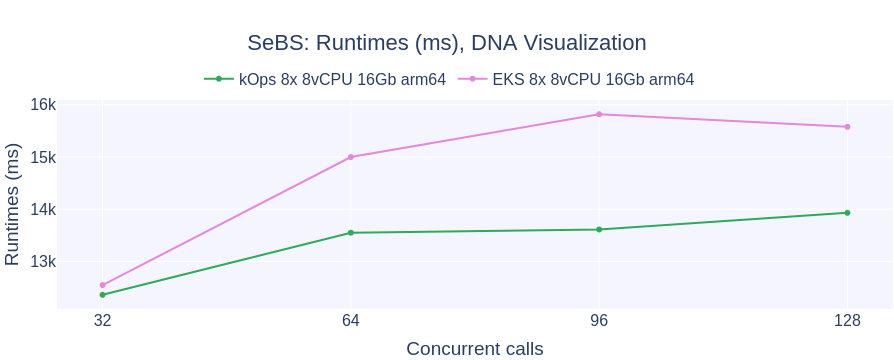

In [19]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title = dict(
        text = "SeBS: Runtimes (ms), DNA Visualization",
        x = 0.5,
        xanchor = 'center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['dna'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

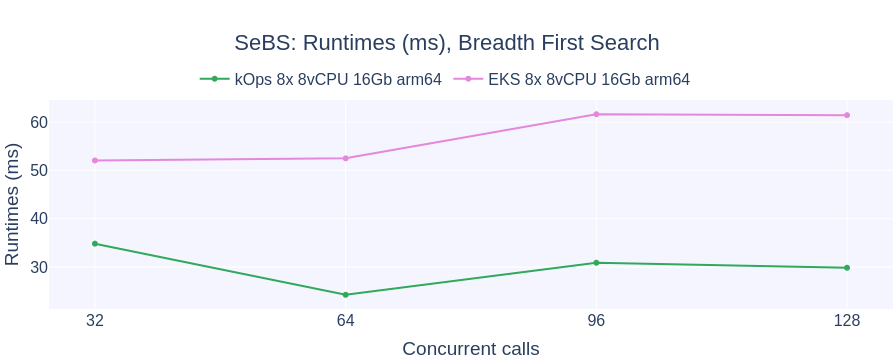

In [20]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title = dict(
        text = "SeBS: Runtimes (ms), Breadth First Search",
        x = 0.5,
        xanchor = 'center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['bfs'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

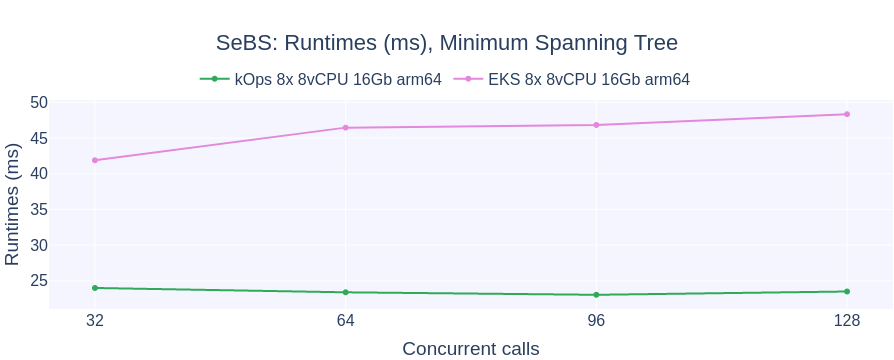

In [21]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title = dict(
        text = "SeBS: Runtimes (ms), Minimum Spanning Tree",
        x = 0.5,
        xanchor = 'center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['mst'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

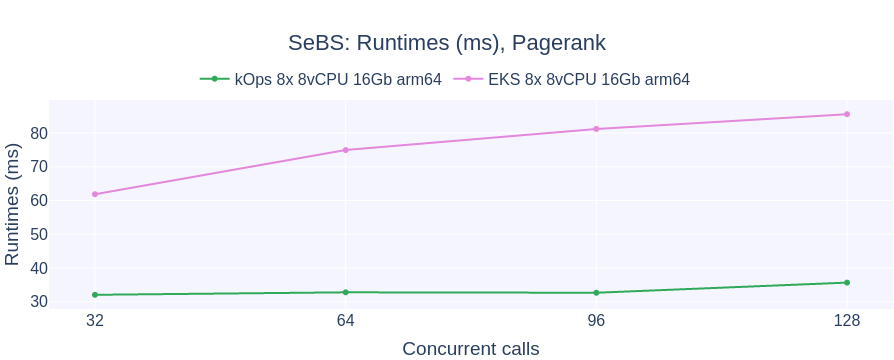

In [22]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title = dict(
        text = "SeBS: Runtimes (ms), Pagerank",
        x = 0.5,
        xanchor = 'center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [sebs_df[k]['pagerank'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

In [23]:
# Standard deviation runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            data[count].append(std_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Std runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,3570.17,22.0422,5.9864,3.84565
64,3954.31,6.04273,3.43884,6.71285
96,3386.86,18.4913,2.19233,5.89062
128,3053,17.9924,4.72264,12.9948


concurrent calls,dna,bfs,mst,pagerank
32,3500.4,28.0276,24.5434,34.6454
64,6314.25,26.3205,26.9365,36.1974
96,7418.47,27.1098,26.2737,37.8795
128,6974.49,27.2181,27.0043,38.9273


In [24]:
# CV runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            cv_runtime=std_runtime/mean_runtime
            data[count].append(cv_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>CV runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,0.288787,0.633057,0.249433,0.120059
64,0.291806,0.249346,0.147008,0.204875
96,0.24881,0.599009,0.095142,0.180463
128,0.219137,0.603012,0.200917,0.364566


concurrent calls,dna,bfs,mst,pagerank
32,0.278938,0.538539,0.585893,0.560181
64,0.420978,0.501448,0.579707,0.483024
96,0.468951,0.439915,0.560904,0.466431
128,0.447738,0.443129,0.558554,0.454879


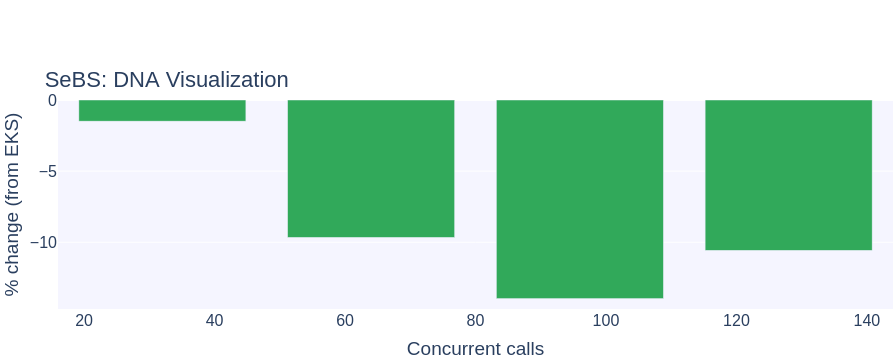

In [25]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "SeBS: DNA Visualization",
        'y':0.8,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['dna'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb arm64']['dna'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/sebs_arm64_dna_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [26]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (DNA Visualization)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['dna'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb arm64']['dna'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=-0.6669996717003603, pvalue=0.5050134937242924)
64 concurrent calls
Ttest_indResult(statistic=-4.916273492862127, pvalue=9.965998872426148e-07)
96 concurrent calls
Ttest_indResult(statistic=-8.38539600549241, pvalue=9.655063210649636e-17)
128 concurrent calls
Ttest_indResult(statistic=-7.731366926045675, pvalue=1.5178949334624195e-14)


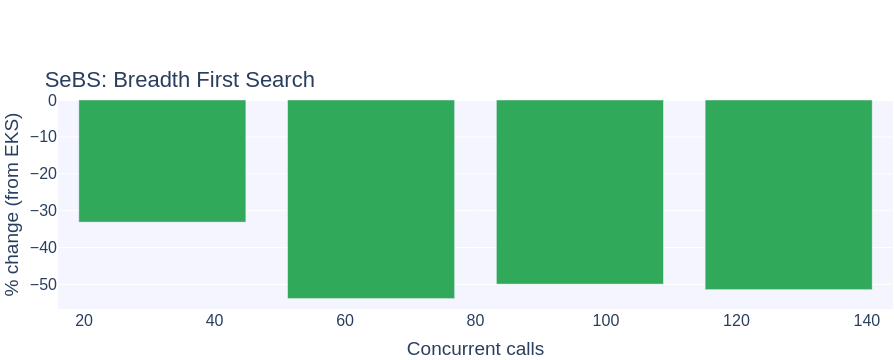

In [27]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "SeBS: Breadth First Search",
        'y':0.8,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['bfs'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb arm64']['bfs'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/sebs_arm64_bfs_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [28]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (Breadth First Search)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['bfs'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb arm64']['bfs'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=-8.641554995077845, pvalue=4.453603026073273e-17)
64 concurrent calls
Ttest_indResult(statistic=-26.46866375117036, pvalue=1.8847312682870626e-123)
96 concurrent calls
Ttest_indResult(statistic=-29.038434452675535, pvalue=5.647486850596949e-154)
128 concurrent calls
Ttest_indResult(statistic=-34.63414645354037, pvalue=7.095019313524402e-216)


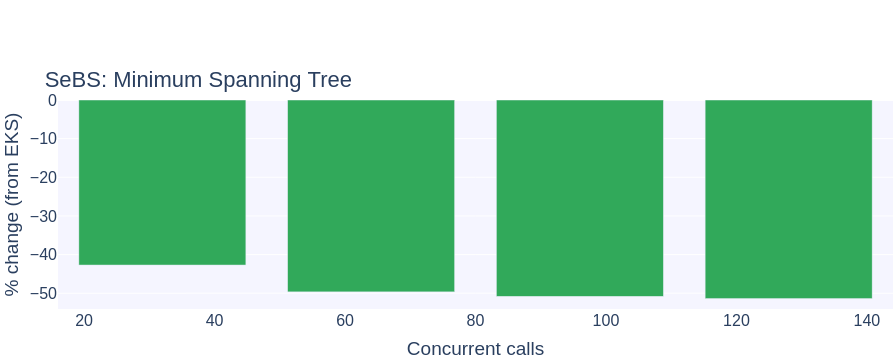

In [29]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "SeBS: Minimum Spanning Tree",
        'y':0.8,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['mst'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb arm64']['mst'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/sebs_arm64_mst_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [30]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (Minimum Spanning Tree)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['mst'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb arm64']['mst'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=-12.668242619271362, pvalue=5.753442025501913e-33)
64 concurrent calls
Ttest_indResult(statistic=-21.495675026129575, pvalue=9.718949875757071e-88)
96 concurrent calls
Ttest_indResult(statistic=-27.968290375757203, pvalue=1.1699131413120653e-144)
128 concurrent calls
Ttest_indResult(statistic=-32.41947294757546, pvalue=1.8576851855976837e-193)


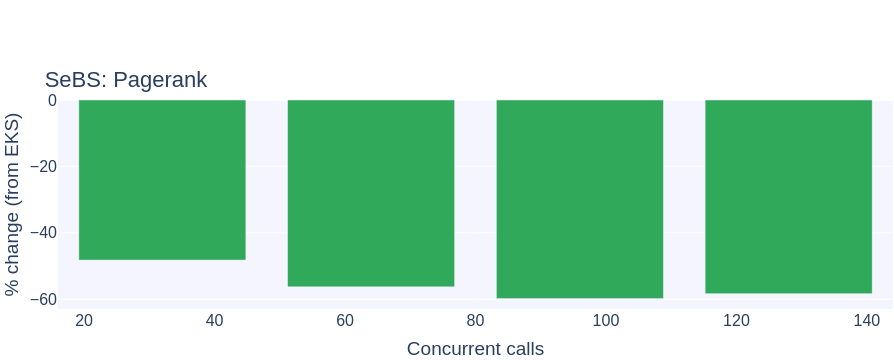

In [31]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "SeBS: Pagerank",
        'y':0.8,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['pagerank'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb arm64']['pagerank'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/sebs_arm64_pagerank_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [32]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (Pagerank)</h3>'))
    for i in range(32,129,32):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(sebs_df[k]['pagerank'][i]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb arm64']['pagerank'][i]['runtime']))

32 concurrent calls
Ttest_indResult(statistic=-15.300790097807202, pvalue=3.0060848293027384e-45)
64 concurrent calls
Ttest_indResult(statistic=-28.980746781723965, pvalue=2.347940845362971e-142)
96 concurrent calls
Ttest_indResult(statistic=-39.25623945230775, pvalue=6.7246165930513054e-248)
128 concurrent calls
Ttest_indResult(statistic=-43.530554737510656, pvalue=2.9687051610923e-310)
